In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv("data/movies_2015_2023_preprocessed_genre.csv")
df.head()

,title,release_year,language,genre,overview,vote_average,vote_count,popularity,cleaned_overview
0,Pad Man,2018,Indisch,Humor,upon realizing extent woman affected menses se...,7.420,200.0,7.036,upon realizing extent woman affected menses se...
1,Tamasha,2015,Indisch,Humor,meeting vacation ved tara sense connection vow...,6.720,141.0,8.770,meeting vacation ved tara sense connection vow...
2,Tu Jhoothi Main Makkaar,2023,Indisch,Humor,earn extra cash mickey help couple break life ...,6.253,144.0,10.045,earn extra cash mickey help couple break life ...
3,Hindi Medium,2017,Indisch,Humor,mita raj batra affluent couple delhi chandni c...,7.300,166.0,7.001,mita raj batra affluent couple delhi chandni c...
4,Dilwale,2015,Indisch,Humor,raj mafia member one day meet girl meera chasi...,6.648,301.0,11.501,raj mafia member one day meet girl meera chasi...


In [3]:
# Remove rows with NaN in the 'overview' column
df_cleaned = df.dropna(subset=['overview'])


In [4]:
# Define the features (overview) and the goal (language)
X = df_cleaned['overview']
y = df_cleaned['language']


Feature Engineering: Bag-of-Words-Ansatz zur Textumwandlung


In [6]:
# Initialize the CountVectorizer for Bag-of-Words
count_vectorizer = CountVectorizer(max_features=5000)
count_vectorizer

# Convert the text into numerical features (Bag-of-Words)
X_bow = count_vectorizer.fit_transform(X)
X_bow


<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 307139 stored elements and shape (15499, 5000)>

In [7]:
# Divide the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)


In [8]:
# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model with the training data
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [9]:
# Make predictions for the test data
y_pred = logreg.predict(X_test)

# Generate a classification report
classification_report_result = classification_report(y_test, y_pred)
print(classification_report_result)


              precision    recall  f1-score   support

Amerikanisch       0.74      0.79      0.76       905
     Deutsch       0.63      0.56      0.59       359
 Französisch       0.66      0.65      0.65       529
     Indisch       0.75      0.75      0.75       366
 Italienisch       0.63      0.54      0.58       312
    Spanisch       0.62      0.66      0.64       629

    accuracy                           0.68      3100
   macro avg       0.67      0.66      0.66      3100
weighted avg       0.68      0.68      0.68      3100



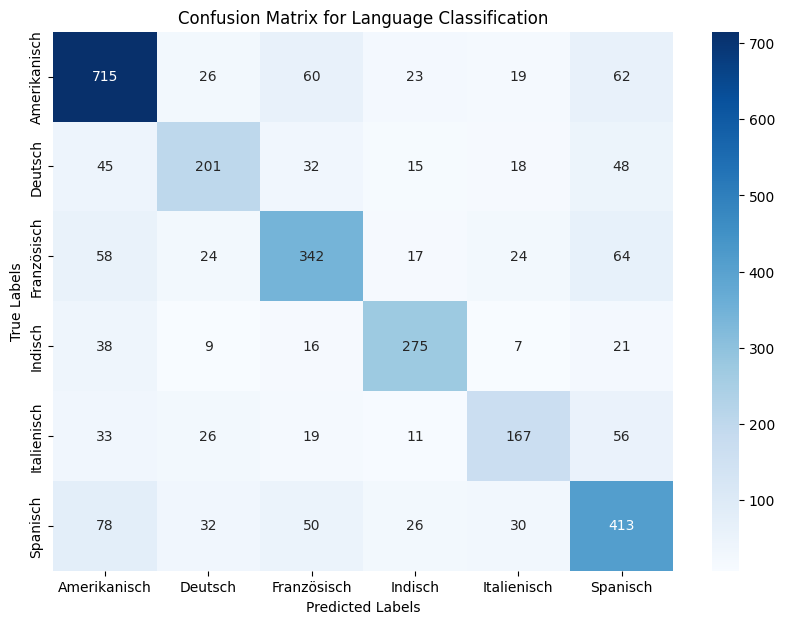

In [10]:
# Import confusion matrix and plot tools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Language Classification')
plt.show()
